In [2]:
# Loading data
import pandas as pd
file_path = 'dblp-v10.csv'  # Update this with your dataset path
data = pd.read_csv(file_path, on_bad_lines='skip')
data.head(10)

,abstract,authors,n_citation,references,title,venue,year,id
0,"In this paper, a robust 3D triangular mesh wat...","['S. Ben Jabra', 'Ezzeddine Zagrouba']",50,"['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa...",A new approach of 3D watermarking based on ima...,international symposium on computers and commu...,2008,4ab3735c-80f1-472d-b953-fa0557fed28b
1,We studied an autoassociative neural network w...,"['Joaquín J. Torres', 'Jesús M. Cortés', 'Joaq...",50,"['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b118...",Attractor neural networks with activity-depend...,Neurocomputing,2007,4ab39729-af77-46f7-a662-16984fb9c1db
2,It is well-known that Sturmian sequences are t...,"['Genevi eve Paquin', 'Laurent Vuillon']",50,"['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e...",A characterization of balanced episturmian seq...,Electronic Journal of Combinatorics,2007,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de
3,One of the fundamental challenges of recognizi...,"['Yaser Sheikh', 'Mumtaz Sheikh', 'Mubarak Shah']",221,"['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac...",Exploring the space of a human action,international conference on computer vision,2005,4ab3a98c-3620-47ec-b578-884ecf4a6206
4,This paper generalizes previous optimal upper ...,"['Efraim Laksman', 'Håkan Lennerstad', 'Magnus...",0,"['01a765b8-0cb3-495c-996f-29c36756b435', '5dbc...",Generalized upper bounds on the minimum distan...,Ima Journal of Mathematical Control and Inform...,2015,4ab3b585-82b4-4207-91dd-b6bce7e27c4e
5,Queueing networks with multiple classes of cus...,"['Simonetta Balsamo', 'Gian–Luca Dei Rossi', '...",6,"['1c26e228-57d2-4b2c-b0c9-8d5851c17fac', '7539...",Applying BCMP multi-class queueing networks fo...,International Journal of Computer Aided Engine...,2015,4ab3e768-78c9-4497-8b8e-9e934cb5f2e4
6,A CMOS oscillator employing differential trans...,"['Andrea Mazzanti', 'Pietro Andreani']",50,"['0a09db01-264a-4bdf-942c-d33cceb35d3c', '36c9...",A Push–Pull Class-C CMOS VCO,IEEE Journal of Solid-state Circuits,2013,4ab3f7cd-140b-4e29-99d4-f4e8006c4f65
7,In statistical setting of the pattern recognit...,['Daniil Ryabko'],2,['505f493b-e09d-444d-9ee2-5e5db6a5b8ac'],On computability of pattern recognition problems,algorithmic learning theory,2005,4ab404e2-6f4b-4fb4-b093-50775e765b13
8,We first discuss some general aspects of micro...,"['Maria Chiara Carrozza', 'Paolo Dario', 'Aria...",50,"['5ecd70e1-7ccc-4b2f-ac09-b91953cca5cd', '7fa7...",Manipulating biological and mechanical micro-o...,international conference on robotics and autom...,1998,4ab4244d-fb3e-49a3-b125-367df3d8e6ba
9,NaN,"['Zhanjun Bai', 'Xing Zhou', 'Ralph Mason']",3,"['54f270aa-ce44-4ece-a2ca-c63a9f266cb3', '638c...",A novel Injection Locked Rotary Traveling Wave...,international symposium on circuits and systems,2014,4ab439a4-9379-44f5-b98b-87125ae7366e




<h3 style = "background-color :#CBDCEB ; border: 0px solid black;border-radius:16px;font-family:Georgia, serif;font-size:22px;color:#143D60;text-align:center">Create 3 bar charts. For each bar chart draw the number of publications in a given year
range. Do this for the ranges 1937-1950, 1950-1970, 1970-1990. Compare the three</h3>

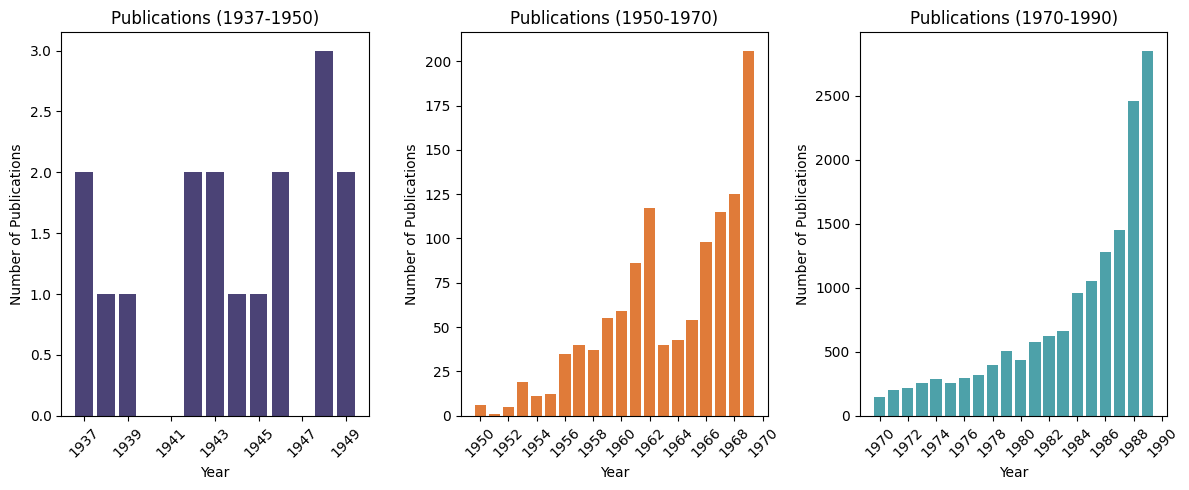

In [11]:
import matplotlib.pyplot as plt
import numpy as np


year_ranges = {
   "1937-1950": (1937, 1950, '#4B4376'),
    "1950-1970": (1950, 1970, '#E07B39'),
    "1970-1990": (1970, 1990, '#4DA1A9')
}


plt.figure(figsize=(12, 5))
for i, (label, (start, end, color)) in enumerate(year_ranges.items(), 1):
    filtered_df = data[(data['year'] >= start) & (data['year'] < end)]
    year_counts = filtered_df['year'].value_counts().sort_index()
    plt.subplot(1, 3, i)  
    plt.bar(year_counts.index, year_counts.values, color=color)
    plt.xticks(np.arange(start, end + 1, step=2), rotation=45)  
    plt.xlabel('Year')
    plt.ylabel('Number of Publications')
    plt.title(f'Publications ({label})')
plt.tight_layout()
plt.show()





<h3 style = "background-color :#CBDCEB ; border: 0px solid black;border-radius:16px;font-family:Georgia, serif;font-size:22px;color:#143D60;text-align:center">Create a bar chart of the number of references over the years</h3>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast  

def count_references(ref):
    if isinstance(ref, str):
        try:
            ref_list = ast.literal_eval(ref)  # Safely parse string lists
            return len(ref_list) if isinstance(ref_list, list) else 0
        except (SyntaxError, ValueError):
            return 0  
    elif isinstance(ref, list):
        return len(ref)
    else:
        return 0  

data['num_references'] = data['references'].apply(count_references)
yearly_references = data.groupby('year')['num_references'].sum()
plt.figure(figsize=(12, 6))
plt.bar(yearly_references.index, yearly_references.values, color='purple')
plt.xlabel('Year')
plt.ylabel('Number of References')
plt.title('Number of References Over the Years')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<h3 style = "background-color :#CBDCEB ; border: 0px solid black;border-radius:16px;font-family:Georgia, serif;font-size:22px;color:#143D60;text-align:center">Create a bar chart of the number of authors over the years.</h3>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast  
def count_authors(authors):
    if isinstance(authors, str):
        try:
            author_list = ast.literal_eval(authors)  
            return len(author_list) if isinstance(author_list, list) else 0
        except (SyntaxError, ValueError):
            return 0  
    elif isinstance(authors, list):
        return len(authors)
    else:
        return 0  
data['num_authors'] = data['authors'].apply(count_authors)
yearly_authors = data.groupby('year')['num_authors'].sum()
plt.figure(figsize=(12, 6))
plt.bar(yearly_authors.index, yearly_authors.values, color='teal')
plt.xlabel('Year')
plt.ylabel('Number of Authors')
plt.title('Number of Authors Over the Years')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<h3 style = "background-color :#CBDCEB ; border: 0px solid black;border-radius:16px;font-family:Georgia, serif;font-size:22px;color:#143D60;text-align:center"> Find the Pearson correlation coefficient and Spearman Rank correlation coeff
between the number of authors and number of references.</h3>


In [ ]:
import scipy.stats as stats
pearson_corr, pearson_p = stats.pearsonr(data['num_authors'], data['num_references'])
spearman_corr, spearman_p = stats.spearmanr(data['num_authors'], data['num_references'])
pearson_corr, spearman_corr

<h3 style = "background-color :#CBDCEB ; border: 0px solid black;border-radius:16px;font-family:Georgia, serif;font-size:22px;color:#143D60;text-align:center"> Find the Pearson and Spearman correlation coefficient between the number of auth
and number of citations.</h3>

In [ ]:
import scipy.stats as stats


pearson_corr_citations, pearson_p_citations = stats.pearsonr(data['num_authors'], data['n_citation'])
spearman_corr_citations, spearman_p_citations = stats.spearmanr(data['num_authors'], data['n_citation'])
pearson_corr_citations, spearman_corr_citations



<h3 style = "background-color :#CBDCEB ; border: 0px solid black;border-radius:16px;font-family:Georgia, serif;font-size:22px;color:#143D60;text-align:center">Draw a bar chart of the title length over the years..</h3>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data['title_length'] = data['title'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
yearly_title_length = data.groupby('year')['title_length'].mean()

plt.figure(figsize=(12, 6))
plt.bar(yearly_title_length.index, yearly_title_length.values, color='#9A3B3B')
plt.xlabel('Year')
plt.ylabel('Average Title Length')
plt.title('Average Title Length Over the Years')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<h3 style = "background-color :#CBDCEB ; border: 0px solid black;border-radius:16px;font-family:Georgia, serif;font-size:22px;color:#143D60;text-align:center">Draw a wordcloud of the abstracts..</h3>


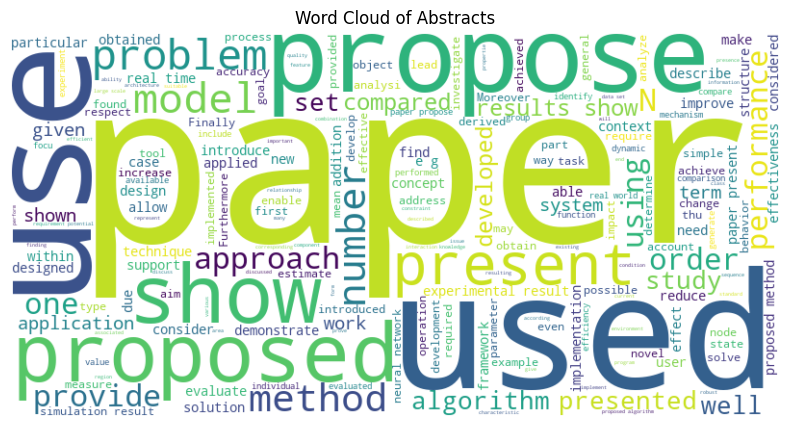

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(data['abstract'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title("Word Cloud of Abstracts")
plt.show()



<h3 style = "background-color :#CBDCEB ; border: 0px solid black;border-radius:16px;font-family:Georgia, serif;font-size:22px;color:#143D60;text-align:center">Find a fitting correlation coefficient between the title length of each paper with the 
length of the papers it references.</h3>


In [4]:
import pandas as pd
import numpy as np
import ast
import scipy.stats as stats

# This section has a result in the other notebook
data['title_length'] = data['title'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
def avg_reference_title_length(ref_list):
    if isinstance(ref_list, str):
        try:
            ref_ids = ast.literal_eval(ref_list)  
            ref_titles = data[data['id'].isin(ref_ids)]['title'] 
            return ref_titles.apply(lambda x: len(str(x)) if pd.notna(x) else 0).mean()
        except (SyntaxError, ValueError):
            return np.nan  
    elif isinstance(ref_list, list):
        ref_titles = data[data['id'].isin(ref_list)]['title']
        return ref_titles.apply(lambda x: len(str(x)) if pd.notna(x) else 0).mean()
    else:
        return np.nan  
data['avg_ref_title_length'] = data['references'].apply(avg_reference_title_length)
filtered_data = data.dropna(subset=['title_length', 'avg_ref_title_length'])
pearson_corr_ref, pearson_p_ref = stats.pearsonr(filtered_data['title_length'], filtered_data['avg_ref_title_length'])
spearman_corr_ref, spearman_p_ref = stats.spearmanr(filtered_data['title_length'], filtered_data['avg_ref_title_length'])
pearson_corr_ref, spearman_corr_ref


KeyboardInterrupt: 

 

<h3 style = "background-color :#CBDCEB ; border: 0px solid black;border-radius:16px;font-family:Georgia, serif;font-size:22px;color:#143D60;text-align:center">Find the top 10 authors with the most publications.</h3>


In [6]:
import pandas as pd
import ast

def extract_authors(author_list):
    if isinstance(author_list, str):
        try:
            return ast.literal_eval(author_list)  
        except (SyntaxError, ValueError):
            return []  
    elif isinstance(author_list, list):
        return author_list
    else:
        return [] 

data['author_list'] = data['authors'].apply(extract_authors)
author_counts = data.explode('author_list')['author_list'].value_counts()
author_counts.head(10)

author_list
Wei Wang       950
Wei Zhang      657
Yang Liu       629
Lei Zhang      579
Wei Li         559
Jun Wang       544
Lei Wang       519
Lajos Hanzo    458
Wei Liu        456
Jun Zhang      455
Name: count, dtype: int64


<h3 style = "background-color :#CBDCEB ; border: 0px solid black;border-radius:16px;font-family:Georgia, serif;font-size:22px;color:#143D60;text-align:center">Find the top 10 authors with the most citations.</h3>


In [7]:
import pandas as pd
import ast
def extract_authors(author_list):
    if isinstance(author_list, str):
        try:
            return ast.literal_eval(author_list)  
        except (SyntaxError, ValueError):
            return [] 
    elif isinstance(author_list, list):
        return author_list
    else:
        return []  

data['author_list'] = data['authors'].apply(extract_authors)
authors_exploded = data.explode('author_list')
author_citations = authors_exploded.groupby('author_list')['n_citation'].sum()
author_citations.nlargest(10)



author_list
David G. Lowe        65344
Hari Balakrishnan    55096
Scott Shenker        54164
Ian F. Akyildiz      53654
Michael I. Jordan    53448
Ion Stoica           52890
Chih-Jen Lin         52302
Takeo Kanade         50743
Deborah Estrin       49925
Vladimir Vapnik      49755
Name: n_citation, dtype: int64

<h3 style = "background-color :#CBDCEB ; border: 0px solid black;border-radius:16px;font-family:Georgia, serif;font-size:22px;color:#143D60;text-align:center">Find the top 10 papers with the most references.</h3>

In [8]:
import ast
def count_references(ref_list):
    if isinstance(ref_list, str):
        try:
            return len(ast.literal_eval(ref_list))  
        except (SyntaxError, ValueError):
            return 0  
    elif isinstance(ref_list, list):
        return len(ref_list)
    else:
        return 0  

data['num_references'] = data['references'].apply(count_references)
print(data[['title', 'num_references']].nlargest(10, 'num_references'))



                                                    title  num_references
371369  Comprehensive frequency-dependent substrate no...             759
780292                    Time in Qualitative Simulation.             561
104143                  Bibliography on cyclostationarity             412
214646  Fifty Years of MIMO Detection: The Road to Lar...             396
484969  An Exploration of Enterprise Architecture Rese...             394
223901  Structure and dynamics of molecular networks: ...             386
302124       The NP-completeness column: An ongoing guide             363
707510                                   Digital geometry             361
325083            Deep Learning: Methods and Applications             343
538381  Review: learning bayesian networks: Approaches...             326


<h3 style = "background-color :#CBDCEB ; border: 0px solid black;border-radius:16px;font-family:Georgia, serif;font-size:22px;color:#143D60;text-align:center">Find the top 10 papers with the most citations within the dataset.
</h3>

In [9]:
top_10_papers_citations = data[['title', 'n_citation']].nlargest(10, 'n_citation')
print(top_10_papers_citations)


                                                    title  n_citation
332760  Distinctive Image Features from Scale-Invarian...       42508
294527  Bowling alone: the collapse and revival of Ame...       34288
358174      LIBSVM: A library for support vector machines       33016
716671                                     Random Forests       28679
18485                             Support-Vector Networks       26114
45248   MapReduce: simplified data processing on large...       24381
81801   A fast and elitist multiobjective genetic algo...       24245
150727  A theory for multiresolution signal decomposit...       24182
458466  ImageNet Classification with Deep Convolutiona...       22884
442067  Histograms of oriented gradients for human det...       22795


<h3 style = "background-color :#CBDCEB ; border: 0px solid black;border-radius:16px;font-family:Georgia, serif;font-size:22px;color:#143D60;text-align:center"> Find a way to see how well the number of publications can predict the number of
citations for a given author.</h3>

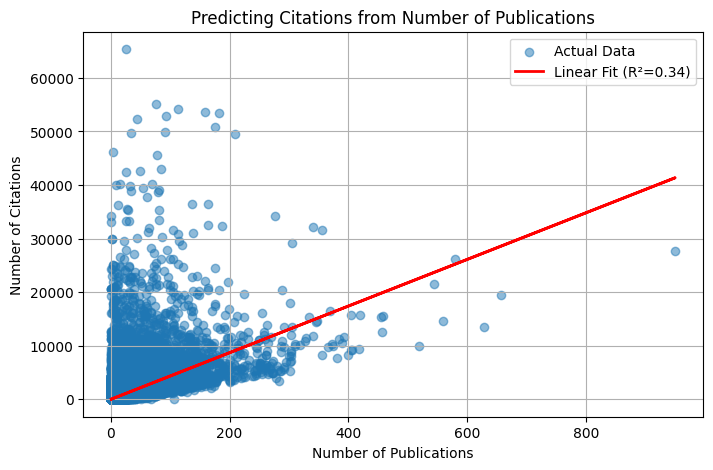

0.3387113945706459

In [10]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
def extract_authors(author_list):
    if isinstance(author_list, str):
        try:
            return ast.literal_eval(author_list)  
        except (SyntaxError, ValueError):
            return []  
    elif isinstance(author_list, list):
        return author_list
    else:
        return [] 
data['author_list'] = data['authors'].apply(extract_authors)
authors_exploded = data.explode('author_list')
author_publications = authors_exploded['author_list'].value_counts()
author_citations = authors_exploded.groupby('author_list')['n_citation'].sum()
author_stats = pd.DataFrame({'publications': author_publications, 'citations': author_citations}).dropna()
X = author_stats['publications'].values.reshape(-1, 1) 
y = author_stats['citations'].values  


reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
r2 = r2_score(y, y_pred)


plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Linear Fit (R²={r2:.2f})')
plt.xlabel('Number of Publications')
plt.ylabel('Number of Citations')
plt.title('Predicting Citations from Number of Publications')
plt.legend()
plt.grid(True)
plt.show()


r2
